In [2]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def DESCENDING_CORRELATION_VISUALIZATION(df, features, target):
    corr_features_all = [target] + features

    corr_with_target = df[corr_features_all].corr()[[target]].drop(target).sort_values(target, ascending=False)

    sns.heatmap(
        corr_with_target,
        annot=True,
        cmap="coolwarm",
        center=0,
        cbar_kws={"shrink": 0.8}
    )

    plt.title("Correlation Between Features and Target target")
    plt.tight_layout()
    # plt.savefig("correlation between target and (all) features_1.png")
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from testModels.RandomForest import RandomForestPipeline
from testModels.LSTM import LSTMClassifier

Balanced: every cateogry 600 in total, 200 per category (neg(0):1-2, neu(1):3, pos(0):4-5)
Counter({0: 6179, 2: 6135, 1: 6086})


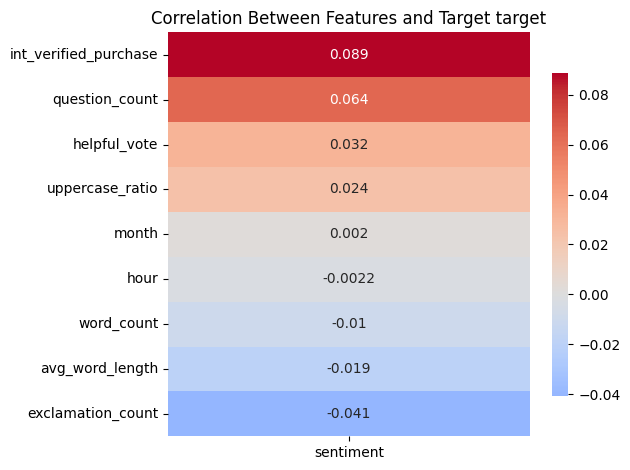

ML: Random Forest
Original Class Distribution: Counter({0: 6179, 2: 6135, 1: 6086})
Training set size: 14720
Test set size: 3680
Model training completed!
Predictions completed!
MODEL EVALUATION METRICS
Accuracy:  0.4019
Precision: 0.4022
Recall:    0.4019
F1-Score:  0.4020

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.43      0.42      0.43      1243
           1       0.39      0.40      0.40      1209
           2       0.38      0.38      0.38      1228

    accuracy                           0.40      3680
   macro avg       0.40      0.40      0.40      3680
weighted avg       0.40      0.40      0.40      3680



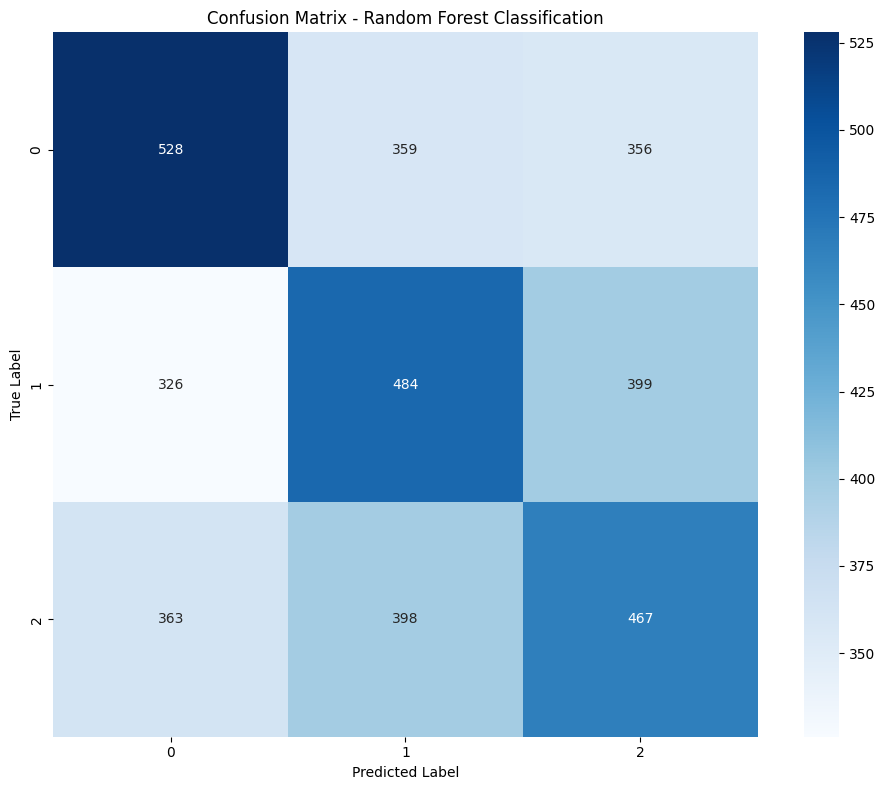

DL: LSTM
Starting LSTM Classification Pipeline

[Step 1] Preprocessing data...
Word Index (first 20): {'br': 1, 'one': 2, 'like': 3, 'would': 4, 'good': 5, 'get': 6, 'use': 7, 'great': 8, 'time': 9, 'work': 10, 'really': 11, 'love': 12, 'well': 13, 'also': 14, 'much': 15, 'make': 16, 'even': 17, 'product': 18, 'book': 19, 'little': 20}
Sequences (first 3): [[155, 185, 80, 4, 1072, 1448], [1955, 891, 3950, 1845, 687, 1316, 98], [1983, 504, 40, 667, 438, 200, 3681, 737, 4926, 47, 3, 36, 438, 182, 65, 333, 21, 1, 1, 1073, 120, 43, 534, 516]]
Padded Sequences shape: (18400, 10)
One-hot Encoded Labels shape: (18400, 3)
X_train shape: (12328, 10), y_train shape: (12328, 3)
X_test shape: (6072, 10), y_test shape: (6072, 3)
✓ Data preprocessing completed

[Step 2] Building LSTM model...
Model Summary:


/Users/yifeicao/Library/Python/3.13/lib/python/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

✓ Model built successfully

[Step 3] Training model...
Epoch 1/20


In [ ]:
# Balanced: every cateogry 600 in total, 200 per category (neg(0):1-2, neu(1):3, pos(0):4-5)
file_path = './3catgoties/amazon_user_reviews_regular_ML_simplified.parquet'
df = pd.read_parquet(file_path)

print("Balanced: every cateogry 600 in total, 200 per category (neg(0):1-2, neu(1):3, pos(0):4-5)")
print(Counter(df["sentiment"]))

features = ['exclamation_count', 'question_count', 'word_count', 'uppercase_ratio',
       'avg_word_length', 'helpful_vote', 'int_verified_purchase', 'hour',
       'month']
target = "sentiment"

# Correlation Visualizaion

DESCENDING_CORRELATION_VISUALIZATION(df, features, target)

# ML: Random Forest Test
print("ML: Random Forest")
y = df[target]
X = df[features]

rf_pipeline = RandomForestPipeline(features=features, test_size=0.2, random_state=42, n_estimators=100)
rf_pipeline.run_pipeline(X, y)

# DL
print("DL: LSTM")
file_path = './3catgoties/amazon_user_reviews_DL_3cat.parquet'
df_DL = pd.read_parquet(file_path)

classifier = LSTMClassifier(vocab_size=10000, max_len=10, embedding_dim=128)
loss, accuracy = classifier.run_pipeline(
    df=df_DL,
    text_column='text_cleaned',
    label_column=target,
    epochs=5,
    batch_size=32
)
    

Balanced: every category 500 in total, 100 per rating
Counter({4.0: 3093, 5.0: 3092, 3.0: 3084, 1.0: 3037, 2.0: 2991})


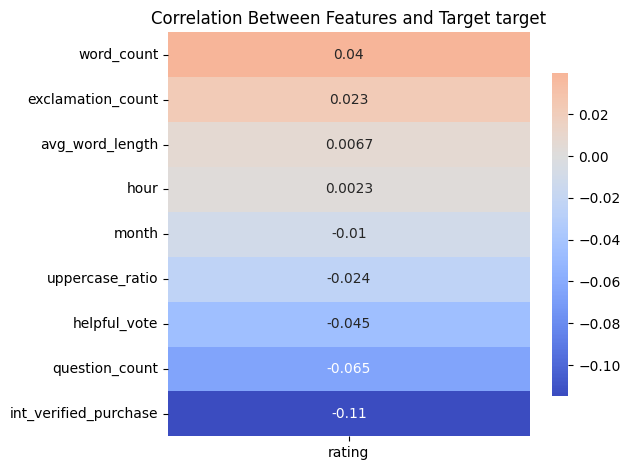

ML: Random Forest
Original Class Distribution: Counter({4.0: 3093, 5.0: 3092, 3.0: 3084, 1.0: 3037, 2.0: 2991})
Training set size: 12237
Test set size: 3060
Model training completed!
Predictions completed!
MODEL EVALUATION METRICS
Accuracy:  0.2624
Precision: 0.2637
Recall:    0.2624
F1-Score:  0.2628

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         1.0       0.28      0.29      0.29       607
         2.0       0.23      0.25      0.24       596
         3.0       0.23      0.25      0.24       599
         4.0       0.27      0.25      0.26       634
         5.0       0.29      0.27      0.28       624

    accuracy                           0.26      3060
   macro avg       0.26      0.26      0.26      3060
weighted avg       0.26      0.26      0.26      3060



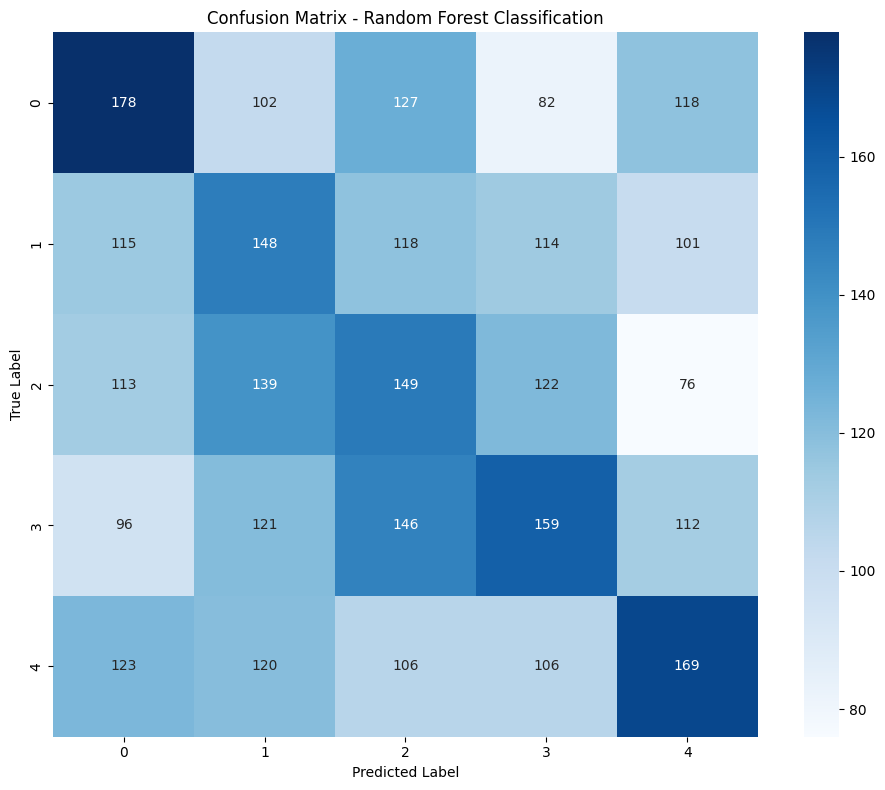

In [ ]:
# Balanced: every category 500 in total, 100 per rating
file_path = './100_per_rating/100_amazon_user_reviews_regular_ML_simplified.parquet'
df = pd.read_parquet(file_path)

print("Balanced: every category 500 in total, 100 per rating")
print(Counter(df["rating"]))

features = ['exclamation_count', 'question_count', 'word_count', 'uppercase_ratio',
       'avg_word_length', 'helpful_vote', 'int_verified_purchase', 'hour',
       'month']
target = "rating"

# Correlation Visualizaion
DESCENDING_CORRELATION_VISUALIZATION(df, features, target)

# Random Forest Test
print("ML: Random Forest")
y = df[target]
X = df[features]

rf_pipeline = RandomForestPipeline(features=features, test_size=0.2, random_state=42, n_estimators=100)
rf_pipeline.run_pipeline(X, y)

# DL
print("DL: LSTM")
file_path = './100_per_rating/amazon_user_reviews_DL_100.parquet'
df_DL = pd.read_parquet(file_path)

classifier = LSTMClassifier(vocab_size=10000, max_len=10, embedding_dim=128)
loss, accuracy = classifier.run_pipeline(
    df=df_DL,
    text_column='text_cleaned',
    label_column=target,
    epochs=5,
    batch_size=32
)
    

Unblanced: every category 500 intotal, no other limitation
Before Downsampling: Counter({5.0: 11212, 4.0: 2750, 3.0: 1268, 1.0: 1064, 2.0: 655})


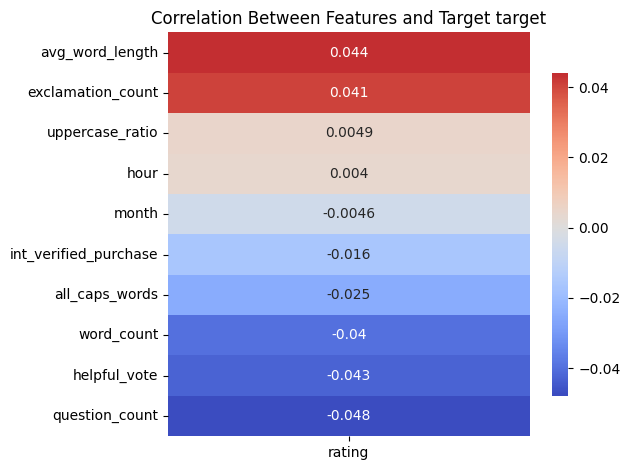

After Downsampling: Counter({4.0: 2750, 3.0: 1268, 1.0: 1064, 2.0: 655, 5.0: 655})
Original Class Distribution: Counter({4.0: 2750, 3.0: 1268, 1.0: 1064, 2.0: 655, 5.0: 655})
Training set size: 5113
Test set size: 1279
Model training completed!
Predictions completed!
MODEL EVALUATION METRICS
Accuracy:  0.4066
Precision: 0.3296
Recall:    0.4066
F1-Score:  0.3440

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         1.0       0.33      0.21      0.26       231
         2.0       0.04      0.01      0.01       131
         3.0       0.22      0.15      0.18       240
         4.0       0.47      0.78      0.59       547
         5.0       0.22      0.07      0.11       130

    accuracy                           0.41      1279
   macro avg       0.26      0.24      0.23      1279
weighted avg       0.33      0.41      0.34      1279



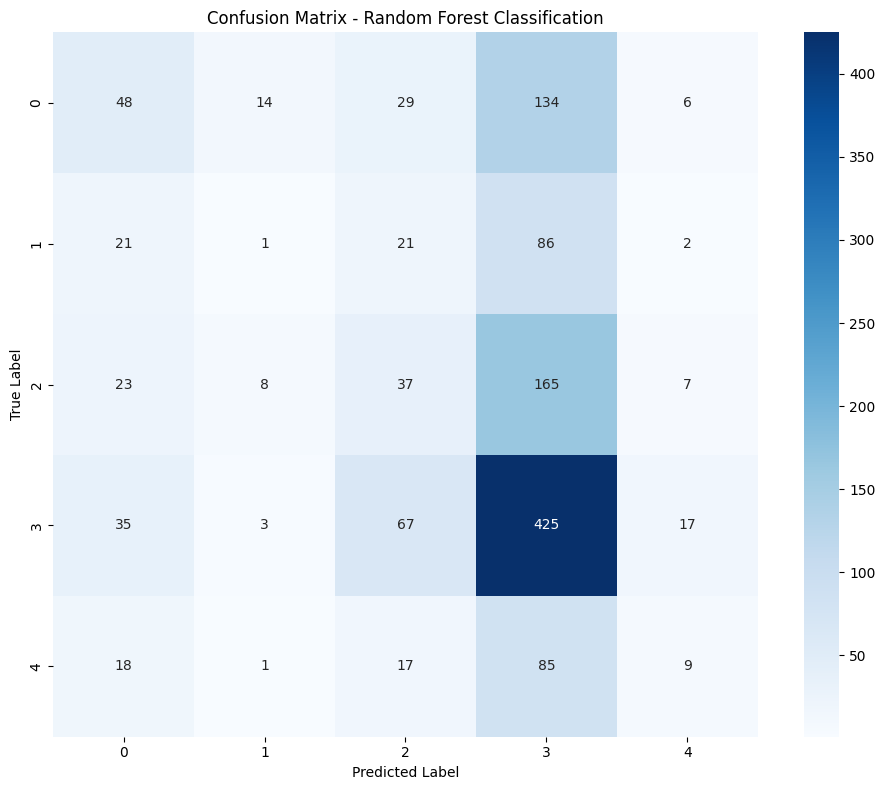

In [ ]:
# Unblanced: every category 500 intotal, no other limitation
file_path = './amazon_user_reviews_regular_ML_simplified.parquet'
df = pd.read_parquet(file_path)

print("Unblanced: every category 500 intotal, no other limitation")
print(f"Before Downsampling: {Counter(df["rating"])}")

features = ['exclamation_count', 'question_count', 'word_count', 'uppercase_ratio',
       'avg_word_length', 'helpful_vote', 'int_verified_purchase', 'hour',
       'month', 'all_caps_words']
target = "rating"

# Correlation Visualizaion
DESCENDING_CORRELATION_VISUALIZATION(df, features, target)

# Random Forest Test
y = df[target]
X = df[features]

# Deal with unbalnce
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority')
X_resampled_down, y_resampled_down = rus.fit_resample(X, y)

print(f"After Downsampling: {Counter(y_resampled_down)}")

rf_pipeline = RandomForestPipeline(features=features, test_size=0.2, random_state=42, n_estimators=100)
rf_pipeline.run_pipeline(X_resampled_down, y_resampled_down)


# DL
print("DL: LSTM")
file_path = './amazon_user_reviews_DL.parquet'
df_DL = pd.read_parquet(file_path)

# Use df_DL for text and labels
y_DL = df_DL[target]
X_DL = df_DL['text_cleaned']
print(f"Before Downsampling: {Counter(7)}")

# Convert X_DL to DataFrame for resampling (sampler expects 2D)
X_DL_df = X_DL.to_frame()
X_DL_resampled_down, y_DL_resampled_down = rus.fit_resample(X_DL_df, y_DL)

print(f"After Downsampling: {Counter(y_DL_resampled_down)}")

# Recompose into a DataFrame with resampled text and labels
df_DL_resampled_down = pd.DataFrame({
    'text_cleaned': X_DL_resampled_down['text_cleaned'].values,
    target: y_DL_resampled_down
})

classifier = LSTMClassifier(vocab_size=10000, max_len=10, embedding_dim=128)
loss, accuracy = classifier.run_pipeline(
    df=df_DL_resampled_down,
    text_column='text_cleaned',
    label_column=target,
    epochs=5,
    batch_size=32,
)
